## Manipulação

In [37]:
import pandas as pd
from datetime import datetime, timedelta

In [20]:
df_bruto = pd.read_csv('./Dados/tvfeed_petr4.csv')
df = df_bruto.copy()
df.head(3)

,datetime,symbol,open,high,low,close,volume
0,2022-09-12 12:00:00,BMFBOVESPA:PETR4,27.959934,27.968732,27.854359,27.907147,981930.0
1,2022-09-12 12:05:00,BMFBOVESPA:PETR4,27.907147,27.959934,27.880753,27.942338,1205048.0
2,2022-09-12 12:10:00,BMFBOVESPA:PETR4,27.942338,28.047914,27.924742,28.021520,834736.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-09-12 12:00:00 to 2022-12-01 13:05:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  5000 non-null   object 
 1   open    5000 non-null   float64
 2   high    5000 non-null   float64
 3   low     5000 non-null   float64
 4   close   5000 non-null   float64
 5   volume  5000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 273.4+ KB


In [23]:
df.set_index('datetime', inplace=True)
df.index = pd.to_datetime(df.index)
df.head(3)

,symbol,open,high,low,close,volume
datetime,,,,,,
2022-09-12 12:00:00,BMFBOVESPA:PETR4,27.959934,27.968732,27.854359,27.907147,981930.0
2022-09-12 12:05:00,BMFBOVESPA:PETR4,27.907147,27.959934,27.880753,27.942338,1205048.0
2022-09-12 12:10:00,BMFBOVESPA:PETR4,27.942338,28.047914,27.924742,28.021520,834736.0


In [53]:
# Selecionando apenas dados do dia 20/09
df[df.index.date == datetime(2022, 9, 14).date()]

# Selecionando entre as datas 15/09 e 20/09
df[(df.index.date >= datetime(2022,9,15).date()) & (df.index.date <= datetime(2022,9,20).date())]


,symbol,open,high,low,close,volume
datetime,,,,,,
2022-09-15 10:00:00,BMFBOVESPA:PETR4,27.203309,27.352875,27.097734,27.300087,617755.0
2022-09-15 10:05:00,BMFBOVESPA:PETR4,27.282491,27.352875,27.229703,27.344077,1236192.0
2022-09-15 10:10:00,BMFBOVESPA:PETR4,27.352875,27.449652,27.247299,27.432056,1250286.0
2022-09-15 10:15:00,BMFBOVESPA:PETR4,27.432056,27.449652,27.317683,27.370471,520232.0
2022-09-15 10:20:00,BMFBOVESPA:PETR4,27.370471,27.396865,27.300087,27.344077,352920.0
...,...,...,...,...,...,...
2022-09-20 17:35:00,BMFBOVESPA:PETR4,27.317683,27.317683,27.273693,27.308885,38301.0
2022-09-20 17:40:00,BMFBOVESPA:PETR4,27.291289,27.308885,27.273693,27.273693,13182.0
2022-09-20 17:45:00,BMFBOVESPA:PETR4,27.273693,27.291289,27.264895,27.264895,34892.0


## Rolling

Parecido com o groupby

In [61]:
# Selecionando apenas dados do dia 14/09
df13 = df[df.index.date == datetime(2022, 9, 14).date()].copy()

df13['mm5'] = df13.rolling(window=5)['close'].mean()

df13.head(10)

,symbol,open,high,low,close,volume,mm5
datetime,,,,,,,
2022-09-14 10:00:00,BMFBOVESPA:PETR4,27.053744,27.141724,26.992158,27.053744,745512.0,NaN
2022-09-14 10:05:00,BMFBOVESPA:PETR4,27.044946,27.062542,26.956966,27.018552,1166858.0,NaN
2022-09-14 10:10:00,BMFBOVESPA:PETR4,27.018552,27.168117,26.948168,27.071340,1103434.0,NaN
2022-09-14 10:15:00,BMFBOVESPA:PETR4,27.080138,27.264895,27.080138,27.150522,1221189.0,NaN
2022-09-14 10:20:00,BMFBOVESPA:PETR4,27.159319,27.238501,27.088936,27.124128,1089454.0,27.083657
2022-09-14 10:25:00,BMFBOVESPA:PETR4,27.124128,27.229703,27.106532,27.212107,654125.0,27.115330
2022-09-14 10:30:00,BMFBOVESPA:PETR4,27.212107,27.388067,27.185713,27.212107,2269841.0,27.154041
2022-09-14 10:35:00,BMFBOVESPA:PETR4,27.203309,27.458450,27.203309,27.396865,1288364.0,27.219146
2022-09-14 10:40:00,BMFBOVESPA:PETR4,27.396865,27.599218,27.370471,27.590420,2226535.0,27.307125


<Axes: xlabel='datetime'>

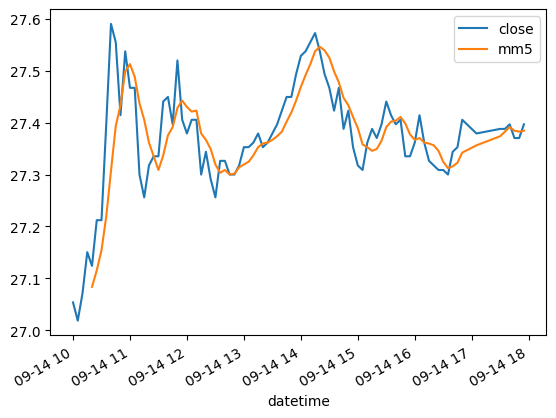

In [76]:
import matplotlib as plot

df13.loc[:,['close','mm5']].plot()

## .CSV e .Parquet

Parquet é mais rápido

In [81]:
import pyarrow as pa
import pyarrow.parquet as pq

import time

In [84]:
t0 = time.time()

df.to_csv('./Dados/petr4_ticks_exportado.csv')

t1 = time.time()
print(t1-t0)

0.820101261138916


In [89]:
t0 = time.time()

df_csv = pd.read_csv('./Dados/petr4_ticks.csv')

t1 = time.time()
print(t1-t0)

0.1270291805267334


In [90]:
t0 = time.time()

table = pa.Table.from_pandas(df)
write = pq.ParquetWriter("./Dados/petr4.parquet", table.schema)
write.write_table(table)
write.close()

t1 = time.time()
print(t1-t0)

0.019005775451660156


In [91]:
t0 = time.time()

df_parquet = pq.ParquetFile('./Dados/petr4.parquet').read().to_pandas()

t1 = time.time()
print(t1-t0)

0.01199793815612793
